In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the dataset into a Pandas Dataframe

In [5]:
df = pd.read_csv('crime_data.csv')
df.head()

,Arrest Year,Arrest Date,Arrest Hour,Age,Defendant Race,Defendant Ethnicity,Defendant Sex,Arrest Category,Offense Latitude,Offense Longitude
0,2021,1/1/21,0,38,BLACK,UNKNOWN,MALE,Damage to Property,38.927,-77.006
1,2021,1/1/21,0,31,BLACK,NOT HISPANIC,MALE,Simple Assault,38.925,-77.033
2,2021,1/1/21,0,35,BLACK,NOT HISPANIC,MALE,Weapon Violations,38.900,-76.930
3,2021,1/1/21,0,31,BLACK,NOT HISPANIC,MALE,Weapon Violations,38.849,-76.976
4,2021,1/1/21,0,21,BLACK,NOT HISPANIC,MALE,Weapon Violations,38.882,-76.925


In [6]:
df.shape

(15653, 10)

In [7]:
df.columns

Index(['Arrest Year', 'Arrest Date', 'Arrest Hour', 'Age', 'Defendant Race',
       'Defendant Ethnicity', 'Defendant Sex', 'Arrest Category',
       'Offense Latitude', 'Offense Longitude'],
      dtype='object')

## Data Cleaning

In [8]:
df = df.fillna(0)

In [9]:
df.isnull()

,Arrest Year,Arrest Date,Arrest Hour,Age,Defendant Race,Defendant Ethnicity,Defendant Sex,Arrest Category,Offense Latitude,Offense Longitude
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15648,False,False,False,False,False,False,False,False,False,False
15649,False,False,False,False,False,False,False,False,False,False
15650,False,False,False,False,False,False,False,False,False,False
15651,False,False,False,False,False,False,False,False,False,False


In [10]:
df_sex = df.groupby('Defendant Sex').size().reset_index(name = 'Numbers')
df_sex

,Defendant Sex,Numbers
0,FEMALE,3423
1,MALE,12224
2,UNKNOWN,6


## Criteria Based Label Creation

In [11]:
crimes_age = list(map(float, df.Age))
crimes_mean = sum(crimes_age)/len(crimes_age)
crimes_mean

35.374177473966654

In [12]:
df['Age_mean'] = crimes_mean
df['crime_occurence_age'] = np.where(crimes_age>=df['Age_mean'], '1', '0')
df.groupby('crime_occurence_age').mean()

C:\Users\JNR_A_R_Y_A\AppData\Local\Temp\ipykernel_2172\2502579663.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('crime_occurence_age').mean()


,Arrest Year,Arrest Hour,Age,Offense Latitude,Offense Longitude,Age_mean
crime_occurence_age,,,,,,
0,2021.0,12.743929,26.988725,38.855876,-76.915434,35.374177
1,2021.0,12.925027,47.405195,38.824105,-76.849981,35.374177


## Data Slicing

In [13]:
df1 = df.iloc[:200]
df1.head(200)

,Arrest Year,Arrest Date,Arrest Hour,Age,Defendant Race,Defendant Ethnicity,Defendant Sex,Arrest Category,Offense Latitude,Offense Longitude,Age_mean,crime_occurence_age
0,2021,1/1/21,0,38,BLACK,UNKNOWN,MALE,Damage to Property,38.927,-77.006,35.374177,1
1,2021,1/1/21,0,31,BLACK,NOT HISPANIC,MALE,Simple Assault,38.925,-77.033,35.374177,0
2,2021,1/1/21,0,35,BLACK,NOT HISPANIC,MALE,Weapon Violations,38.900,-76.930,35.374177,0
3,2021,1/1/21,0,31,BLACK,NOT HISPANIC,MALE,Weapon Violations,38.849,-76.976,35.374177,0
4,2021,1/1/21,0,21,BLACK,NOT HISPANIC,MALE,Weapon Violations,38.882,-76.925,35.374177,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,2021,1/13/21,17,54,BLACK,NOT HISPANIC,MALE,Traffic Violations,38.905,-77.017,35.374177,1
196,2021,1/13/21,20,28,BLACK,NOT HISPANIC,MALE,Assault with a Dangerous Weapon,38.888,-76.919,35.374177,0
197,2021,1/13/21,20,33,BLACK,NOT HISPANIC,MALE,Damage to Property,38.845,-76.985,35.374177,0
198,2021,1/13/21,20,31,BLACK,NOT HISPANIC,MALE,Driving/Boating While Intoxicated,38.902,-76.942,35.374177,0


## Feature Selection for Clustering Algorithms

In [14]:
features = ['Offense Latitude', 'Offense Longitude']
X = df1[features].values
y = df1['crime_occurence_age'].astype(float).values

## Plotting the actual data to vizualize it

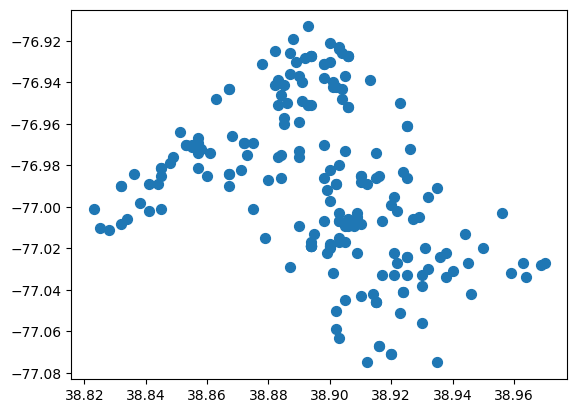

In [15]:
plt.scatter(X[:, 0], X[:, 1], s=50);

## Splitting the data

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Using the elbow method to find the optimal number of clusters

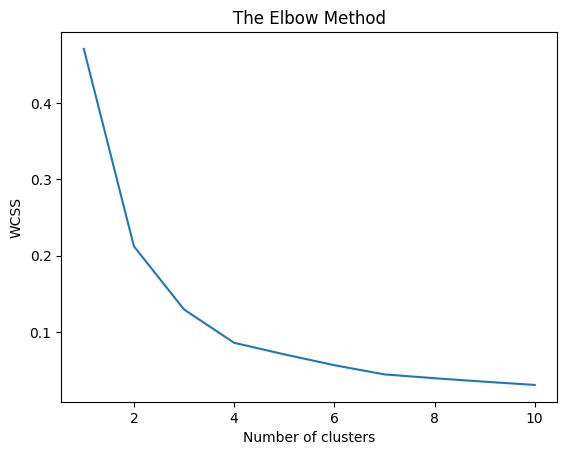

In [17]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans =KMeans(n_clusters =i, init = 'k-means++', max_iter =300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Applying kMeans Algorithm

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)

## Vizualising the clusters

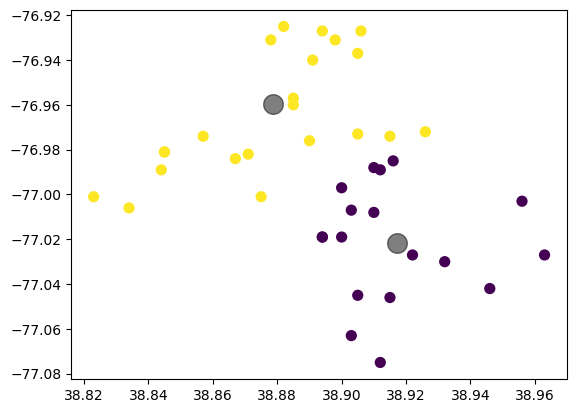

In [19]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Metrics Calculation

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

kmeans_accuracy = accuracy_score(y_test, y_pred)
kmeans_precison=precision_score(y_test,y_pred,average=None)
kmeans_recall=recall_score(y_test,y_pred,average=None)
kmeans_f1=f1_score(y_test,y_pred,average=None)
kmeans_confusion_matrix = confusion_matrix(y_test, y_pred)

In [21]:
print("K-Means")
print("Scores")
print("Accuracy -->",kmeans_accuracy)
print("Precison -->",kmeans_precison)
print("Recall -->",kmeans_recall)
print("F1 -->",kmeans_f1)

print("Confusion Matrix")
print(kmeans_confusion_matrix)

K-Means
Scores
Accuracy --> 0.55
Precison --> [0.77777778 0.36363636]
Recall --> [0.5        0.66666667]
F1 --> [0.60869565 0.47058824]
Confusion Matrix
[[14 14]
 [ 4  8]]


## Applying GMM

### Data Cleaning

In [22]:
#converting huge ranges of data to average values
import re

def extractSubstring(myStr):
    if isinstance(myStr, float):
        return myStr  # Return the float value as is
    elif "-" in myStr:
        lowVal, hiVal = map(float, re.findall(r'\d+\.\d+|\d+', myStr))
        return (lowVal + hiVal) / 2
    else:
        return convert_to_float(myStr)

def convert_to_float(input_str):
    return float(input_str.replace(",", ""))

# Assuming 'df' is your DataFrame
df['Offense Latitude'] = df['Offense Latitude'].apply(extractSubstring)
df['Offense Longitude'] = df['Offense Longitude'].apply(extractSubstring)


### Feature selection

In [23]:
Features = ['Arrest Hour','Age']
X = df[Features].values

## Applying GMM

In [24]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(X)
labels = gmm.predict(X)

## Vizualising the clusters

Text(0.5, 1.0, 'GMM Clustering')

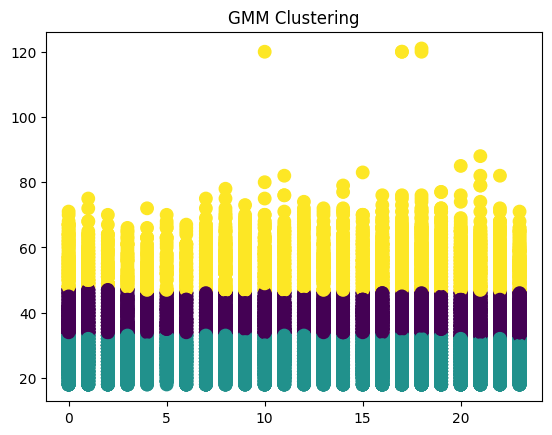

In [25]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=80, cmap='viridis');
plt.title("GMM Clustering")

## Linear Regression

### Feature Selection

In [26]:
X1 = df[['Arrest Hour']].astype(float).values
y1 = df['Age'].astype(int).values

### Splitting the data

In [27]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

### Fitting the model

In [28]:
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()
regr.fit(X1_train, y1_train)

LinearRegression()

### Predicting the values

In [29]:
y_pred = regr.predict(X1_test)

### Vizualisation of plots

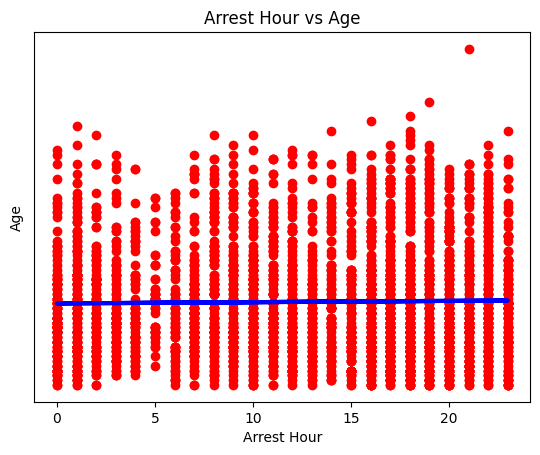

In [30]:
plt.scatter(X1_test, y1_test,  color='red')
plt.plot(X1_test, y_pred, color='blue', linewidth=3)

plt.title('Arrest Hour vs Age')
plt.xlabel('Arrest Hour')
plt.ylabel('Age')

plt.yticks(())
plt.show()

## Logistic Regression

In [31]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score


### Data Slicing

In [32]:
df1 = df.iloc[:200]

### Visualizing Selected Features by plotting their Histograms

In [44]:
df_age = df.groupby('Age').size().reset_index(name = 'Numbers')
df_age

,Age,Numbers
0,18,275
1,19,311
2,20,390
3,21,483
4,22,449
...,...,...
64,83,1
65,85,1
66,88,1
67,120,4


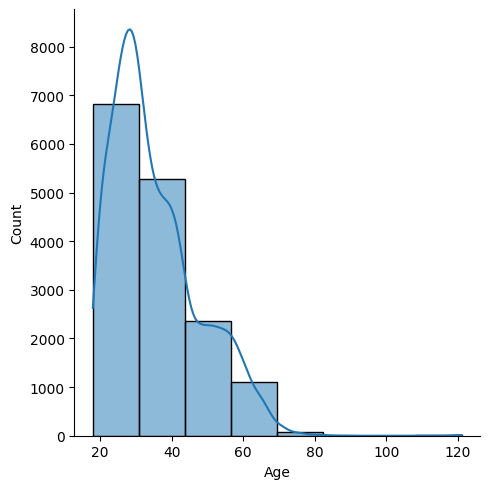

In [50]:
sns.displot(df['Age'], kde = True, bins = 8)

### Plotting the features to analyze the label and its frequency

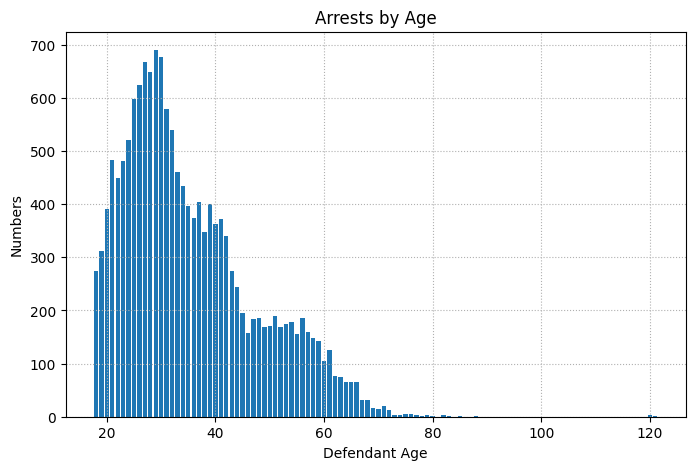

In [49]:
plt.figure(figsize = (8, 5))
plt.xlabel('Defendant Age')
plt.title('Arrests by Age')
plt.ylabel('Numbers')
x = df_age['Age']
y = df_age['Numbers']
plt.bar(x, y)
plt.grid(which = 'both', linestyle = ':')

In [51]:
X_LogReg= ['Age', 'Arrest Year', 'Arrest Hour', 'Offense Latitude', 'Offense Longitude']

In [52]:
y_LogReg = df1[['crime_occurence_age']]

### Training the Model

In [53]:
X_train_LogReg, X_test_LogReg, y_train_LogReg, y_test_LogReg = train_test_split(df1[X_LogReg], y_LogReg, test_size=0.2, random_state=0)

In [54]:
logreg = LogisticRegression()
logreg.fit(X_train_LogReg, y_train_LogReg)

c:\python 3.9\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

## Metrics

In [55]:
y_pred_LogReg = logreg.predict(X_test_LogReg)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_LogReg, y_test_LogReg)))

Accuracy of logistic regression classifier on test set: 0.97


### Creating the Confusion Matrix to make further conclusion

Model Accuracy for Logistic Regression: 0.975


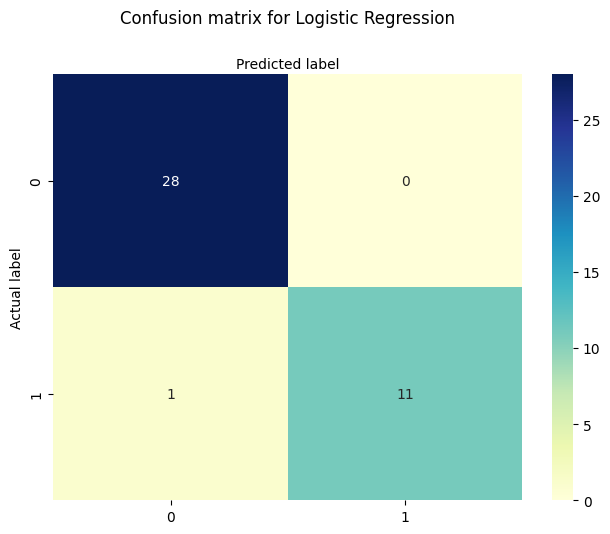

In [56]:
cnf_matrix_LogitRegression = metrics.confusion_matrix(y_test_LogReg, y_pred_LogReg)
cnf_matrix_LogitRegression

class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_LogitRegression), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Logistic Regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Logistic Regression:",metrics.accuracy_score(y_test_LogReg, y_pred_LogReg))

## Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [58]:
df = df[['Arrest Year', 'Arrest Hour', 'Age', 'Offense Latitude', 'Offense Longitude', 'crime_occurence_age']]
df = df
X_DecisionTree = df.drop('crime_occurence_age', axis=1)
Y_DecisionTree = df['crime_occurence_age']

In [59]:
from sklearn.model_selection import train_test_split
X_train_DecisionTree, X_test_DecisionTree, Y_train_DecisionTree, Y_test_DecisionTree = train_test_split(X_DecisionTree, Y_DecisionTree, random_state=1)

## Implementing Decision Tree Classifier

In [60]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=20, min_samples_split=9, min_samples_leaf=6)
clf_gini

DecisionTreeClassifier(max_depth=20, min_samples_leaf=6, min_samples_split=9,
                       random_state=100)

In [61]:
clf_gini.fit(X_train_DecisionTree, Y_train_DecisionTree)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=6, min_samples_split=9,
                       random_state=100)

In [62]:
Y_Pred_DecisionTree = clf_gini.predict(X_test_DecisionTree)
Y_Pred_DecisionTree

array(['1', '1', '1', ..., '1', '0', '0'], dtype=object)

## Metrics

In [63]:
ac=accuracy_score(Y_test_DecisionTree, Y_Pred_DecisionTree)*100
ac

100.0

## Plotting the tree

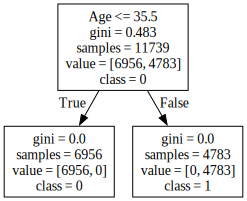

In [64]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, feature_names=X_DecisionTree.columns, class_names=['0','1'])
graph = graphviz.Source(dot_data) 
graph.render("crime") 
graph

## Confusion Matrix

Model Accuracy for Random Forest: 1.0


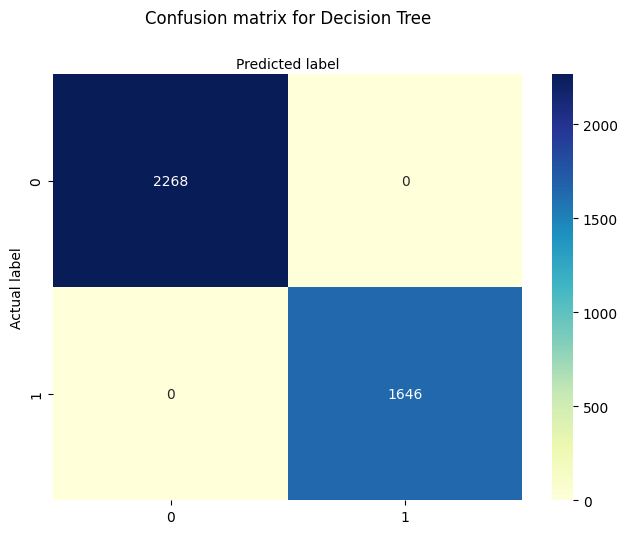

In [65]:
# For Decision Tree
cnf_matrix_DecisionTree = metrics.confusion_matrix(Y_test_DecisionTree, Y_Pred_DecisionTree)
cnf_matrix_DecisionTree
# name  of classes
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_DecisionTree), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Decision Tree', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Random Forest:",metrics.accuracy_score(Y_test_DecisionTree, Y_Pred_DecisionTree))

# Gaussian Naive Bayes Classifier

## Label Creation

In [66]:
age = list(map(float, df['Age']))
age_mean = sum(age) / len(age)
print("Mean Age:", age_mean)

Mean Age: 35.374177473966654


In [67]:
df['mean_age'] = age_mean
df['age_occurence'] = np.where(age>=df['mean_age'], 'yes', 'no')
df.groupby('age_occurence').mean()

C:\Users\JNR_A_R_Y_A\AppData\Local\Temp\ipykernel_2172\4166570457.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('age_occurence').mean()


,Arrest Year,Arrest Hour,Age,Offense Latitude,Offense Longitude,mean_age
age_occurence,,,,,,
no,2021.0,12.743929,26.988725,38.855876,-76.915434,35.374177
yes,2021.0,12.925027,47.405195,38.824105,-76.849981,35.374177


## Data Slicing


In [68]:
df1 = df.iloc[:700]

## Applying Gaussian NB classifier

In [69]:
X_NaiveBayes= [ 'Arrest Hour', 'Age', 'Offense Latitude', 'Offense Longitude', 'crime_occurence_age']
Y_NaiveBayes = df1[['age_occurence']]

In [70]:
X_train_NaiveBayes, X_test_NaiveBayes, Y_train_NaiveBayes, Y_test_NaiveBayes = train_test_split(df1[X_NaiveBayes], Y_NaiveBayes, test_size=0.2, random_state=0)

In [71]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [72]:
model.fit(X_train_NaiveBayes, Y_train_NaiveBayes)

c:\python 3.9\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [73]:
Y_Pred_NaiveBayes = model.predict(X_test_NaiveBayes)
print('Accuracy of Gaussian Naive Bayes classifier on test set: {:.2f}'.format(model.score(X_test_NaiveBayes, Y_test_NaiveBayes)))

Accuracy of Gaussian Naive Bayes classifier on test set: 1.00


## Corelation matrix showing the features

In [74]:
df1[X_NaiveBayes].corr()

C:\Users\JNR_A_R_Y_A\AppData\Local\Temp\ipykernel_2172\444616807.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1[X_NaiveBayes].corr()


,Arrest Hour,Age,Offense Latitude,Offense Longitude
Arrest Hour,1.000000,0.068555,0.029208,-0.071493
Age,0.068555,1.000000,0.049672,-0.130302
Offense Latitude,0.029208,0.049672,1.000000,-0.375405
Offense Longitude,-0.071493,-0.130302,-0.375405,1.000000


## Corelation Heatmap for better visualization

C:\Users\JNR_A_R_Y_A\AppData\Local\Temp\ipykernel_2172\1545454869.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1[X_NaiveBayes].corr(), annot=True, fmt=".1f")


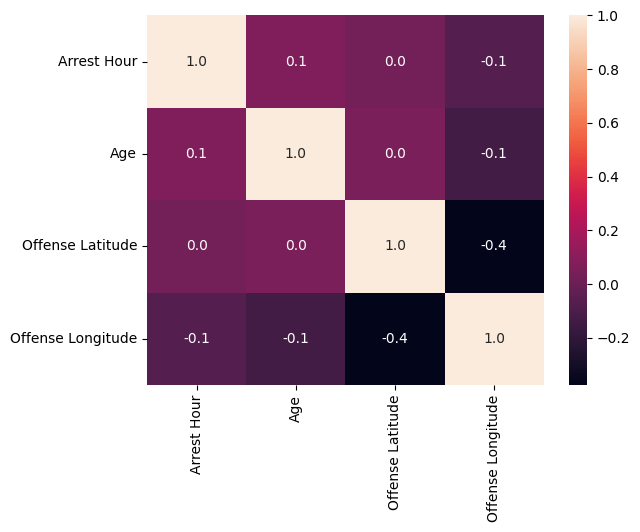

In [75]:
import seaborn as sns
sns.heatmap(df1[X_NaiveBayes].corr(), annot=True, fmt=".1f")
plt.show()

## Confusion Matrix

Model Accuracy for Random Forest: 1.0


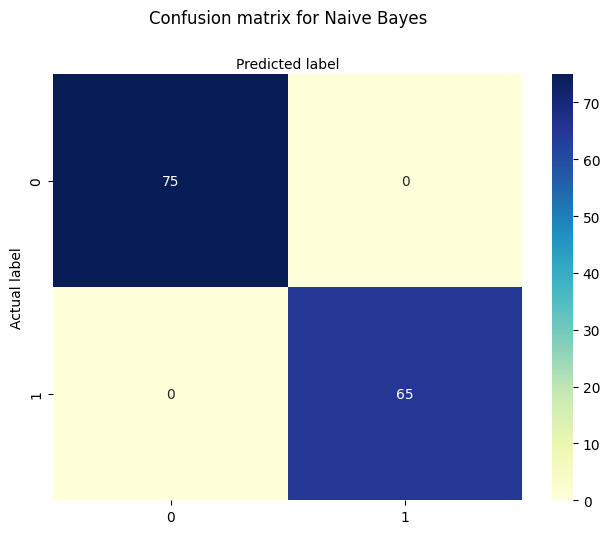

In [76]:
cnf_matrix_NaiveBayes = metrics.confusion_matrix(Y_test_NaiveBayes, Y_Pred_NaiveBayes)
cnf_matrix_NaiveBayes
# name  of classes
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_NaiveBayes), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Naive Bayes', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Random Forest:",metrics.accuracy_score(Y_test_NaiveBayes, Y_Pred_NaiveBayes))

## Gaussian Naive Bayes Classifier

## Label Creation

In [77]:
age = list(map(float, df.Age))
age_mean = sum(age)/len(age)
age_mean

35.374177473966654

In [78]:
df['mean_age'] = age_mean
df['Age_occurence'] = np.where(age>=df['mean_age'], 'yes', 'no')
df.groupby('Age_occurence').mean()

C:\Users\JNR_A_R_Y_A\AppData\Local\Temp\ipykernel_2172\2951576386.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Age_occurence').mean()


,Arrest Year,Arrest Hour,Age,Offense Latitude,Offense Longitude,mean_age
Age_occurence,,,,,,
no,2021.0,12.743929,26.988725,38.855876,-76.915434,35.374177
yes,2021.0,12.925027,47.405195,38.824105,-76.849981,35.374177


## Data Slicing

In [79]:
df1 = df.iloc[:700]

## Applying Gaussian NB classifier

In [80]:
X_NaiveBayes= ['Age','Arrest Hour', 'Offense Latitude','Offense Longitude']
Y_NaiveBayes = df1[['Age_occurence']]

In [81]:
X_train_NaiveBayes, X_test_NaiveBayes, Y_train_NaiveBayes, Y_test_NaiveBayes = train_test_split(df1[X_NaiveBayes], Y_NaiveBayes, test_size=0.2, random_state=0)

In [82]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [83]:
model.fit(X_train_NaiveBayes, Y_train_NaiveBayes)

c:\python 3.9\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

## Model Accuracy

In [84]:
Y_Pred_NaiveBayes = model.predict(X_test_NaiveBayes)
print('Accuracy of Gaussian Naive Bayes classifier on test set: {:.2f}'.format(model.score(X_test_NaiveBayes, Y_test_NaiveBayes)))

Accuracy of Gaussian Naive Bayes classifier on test set: 0.99


## Corelation matrix showing the features

In [85]:
df1[X_NaiveBayes].corr()

,Age,Arrest Hour,Offense Latitude,Offense Longitude
Age,1.000000,0.068555,0.049672,-0.130302
Arrest Hour,0.068555,1.000000,0.029208,-0.071493
Offense Latitude,0.049672,0.029208,1.000000,-0.375405
Offense Longitude,-0.130302,-0.071493,-0.375405,1.000000


## Corelation Heatmap for better visualization

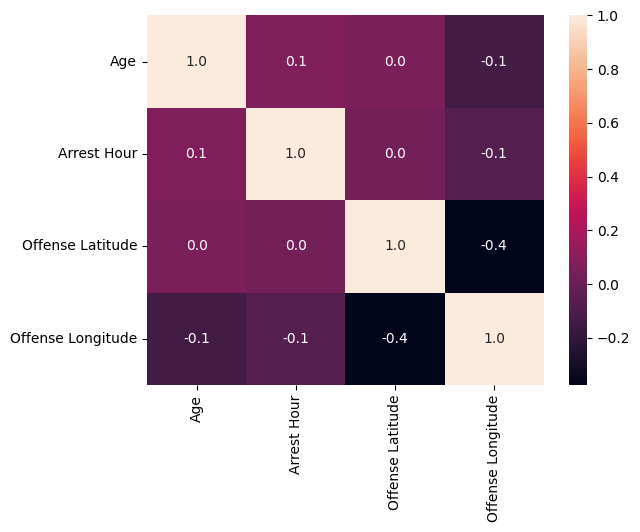

In [86]:
import seaborn as sns
sns.heatmap(df1[X_NaiveBayes].corr(), annot=True, fmt=".1f")
plt.show()

## Confusion Matrix

Model Accuracy for Random Forest: 0.9928571428571429


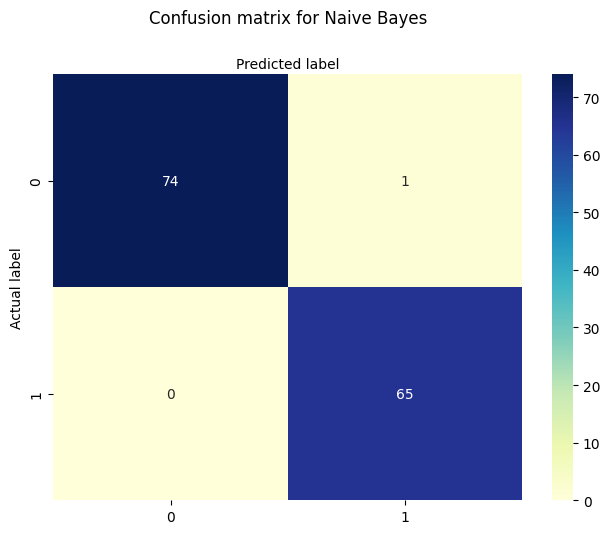

In [87]:
cnf_matrix_NaiveBayes = metrics.confusion_matrix(Y_test_NaiveBayes, Y_Pred_NaiveBayes)
cnf_matrix_NaiveBayes
# name  of classes
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_NaiveBayes), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Naive Bayes', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Random Forest:",metrics.accuracy_score(Y_test_NaiveBayes, Y_Pred_NaiveBayes))

## Random Forest Classifier

## Label Creation

In [88]:
df['mean_age_crimes'] = age_mean
df['crime_occurence_age'] = np.where(age>=df['mean_age_crimes'], 'yes', 'no')
df.groupby('crime_occurence_age').mean()

C:\Users\JNR_A_R_Y_A\AppData\Local\Temp\ipykernel_2172\848525137.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('crime_occurence_age').mean()


,Arrest Year,Arrest Hour,Age,Offense Latitude,Offense Longitude,mean_age,mean_age_crimes
crime_occurence_age,,,,,,,
no,2021.0,12.743929,26.988725,38.855876,-76.915434,35.374177,35.374177
yes,2021.0,12.925027,47.405195,38.824105,-76.849981,35.374177,35.374177


## Feature Selection

In [89]:
df = df[['Arrest Year', 'Arrest Hour', 'Age', 'Offense Latitude', 'Offense Longitude', 'crime_occurence_age']]
df = df
X = df.drop('crime_occurence_age', axis=1)
y = df['crime_occurence_age']

In [90]:
X_train_RandomForest, X_test_RandomForest, Y_train_RandomForest, Y_test_RandomForest = train_test_split(X, y, random_state=1)

### Calculating gini index for Random Forest Classifier

In [91]:
from sklearn.ensemble import RandomForestClassifier
clf_gini = RandomForestClassifier(criterion = "gini",random_state = 200,max_depth=30, min_samples_split=9, min_samples_leaf=6)
clf_gini

RandomForestClassifier(max_depth=30, min_samples_leaf=6, min_samples_split=9,
                       random_state=200)

## Fitting and predicitng the model

In [92]:
clf_gini.fit(X_train_RandomForest, Y_train_RandomForest)

RandomForestClassifier(max_depth=30, min_samples_leaf=6, min_samples_split=9,
                       random_state=200)

In [93]:
Y_Pred_RandomForest = clf_gini.predict(X_test_RandomForest)

## Metrics

In [94]:
ac=accuracy_score(Y_test_RandomForest,Y_Pred_RandomForest)*100
ac

100.0

## Confusion Matrix

In [95]:
cnf_matrix_RandomForest = metrics.confusion_matrix(Y_test_RandomForest, Y_Pred_RandomForest)
cnf_matrix_RandomForest

array([[2268,    0],
       [   0, 1646]], dtype=int64)

Model Accuracy for Random Forest: 1.0


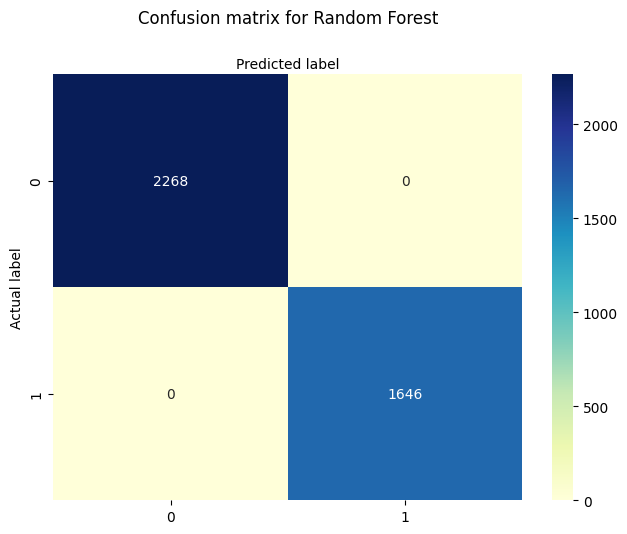

In [96]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_RandomForest), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Random Forest:",metrics.accuracy_score(Y_test_RandomForest, Y_Pred_RandomForest))

## SVM

In [97]:
df = df[['Arrest Year', 'Arrest Hour', 'Age', 'Offense Latitude', 'Offense Longitude', 'crime_occurence_age']]
df = df

In [98]:
X_SVM = df.iloc[:, [3, 4]].values  # Selecting Offense Latitude and Offense Longitude columns
Y_SVM = df.iloc[:, 5].values  # Selecting crime_occurence_age column

### Splitting the dataset into the Training set and Test set

In [99]:
from sklearn.model_selection import train_test_split
X_train_SVM, X_test_SVM, Y_train_SVM, Y_test_SVM = train_test_split(X_SVM, Y_SVM, test_size = 0.30, random_state = 0)

## Feature Scaling

In [100]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_SVM = sc.fit_transform(X_train_SVM)
X_test_SVM = sc.transform(X_test_SVM)
print(X_train_SVM)

[[ 0.06639368 -0.05113853]
 [ 0.03690926 -0.02829877]
 [ 0.03690926 -0.00799677]
 ...
 [ 0.03619013 -0.05005092]
 [ 0.03834752 -0.04642556]
 [ 0.04410058 -0.0417126 ]]


## Training & fitting the model

In [101]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',random_state = 0)
classifier.fit(X_train_SVM, Y_train_SVM)

SVC(kernel='linear', random_state=0)

In [102]:
Y_Pred_SVM = classifier.predict(X_test_SVM)

In [103]:
print(classifier.support_vectors_)

[[ 0.03690926 -0.02829877]
 [ 0.00382918 -0.02721116]
 [ 0.0110205  -0.02322327]
 ...
 [ 0.06639368 -0.05113853]
 [ 0.02684141 -0.03011145]
 [ 0.03834752 -0.04642556]]


## Confusion Matrix

Model Accuracy for SVM: 0.5813458262350937


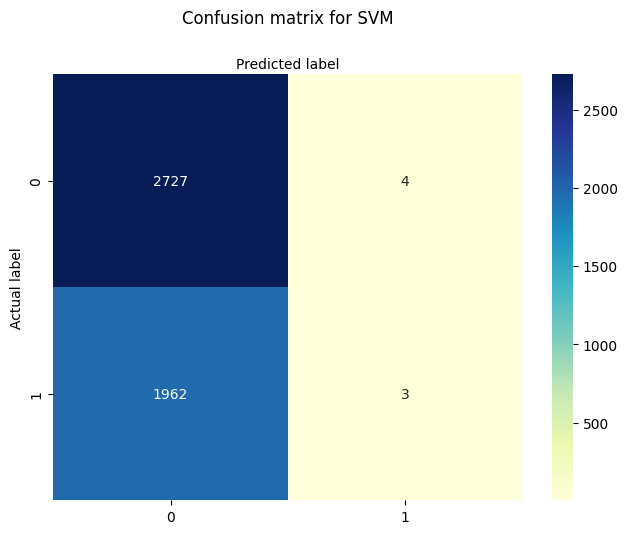

In [104]:
cnf_matrix_RandomForest = metrics.confusion_matrix(Y_test_SVM, Y_Pred_SVM)
cnf_matrix_RandomForest
# name  of classes
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_RandomForest), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for SVM', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for SVM:",metrics.accuracy_score(Y_test_SVM, Y_Pred_SVM))

## Accuracy

In [105]:
ac=accuracy_score(Y_test_SVM,Y_Pred_SVM)*100
ac

58.13458262350937

## Vizualising model results

In [106]:
# Visualising the Training set results

# from matplotlib.colors import ListedColormap
# X_set, y_set = X_train_SVM, Y_train_SVM
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
#                      np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
#                 c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('SVM (Training set)')
# plt.xlabel('Offense Latitude')
# plt.ylabel('Offense Longitude')
# plt.legend()
# plt.show()

## Fitting SVM to the Training set

In [107]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train_SVM, Y_train_SVM)

SVC(random_state=0)

In [108]:
Y_Pred_SVMrbf = classifier.predict(X_test_SVM)

Model Accuracy for Random Forest: 0.5813458262350937


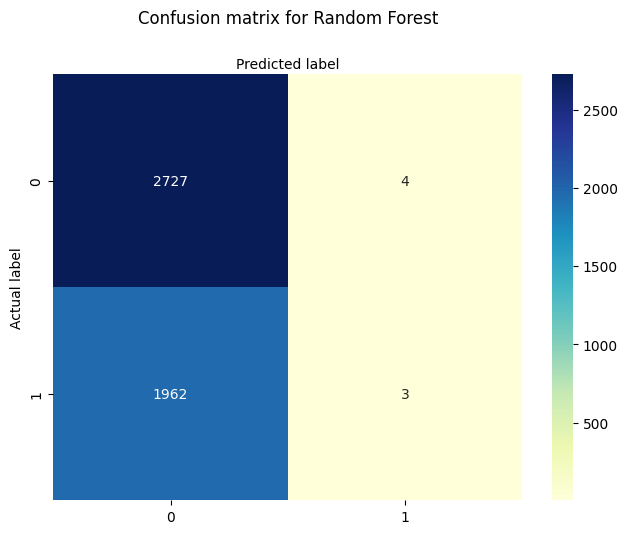

In [109]:
cnf_matrix_RandomForest = metrics.confusion_matrix(Y_test_SVM, Y_Pred_SVMrbf)
cnf_matrix_RandomForest
# name  of classes
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_RandomForest), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Random Forest:",metrics.accuracy_score(Y_test_SVM, Y_Pred_SVMrbf))

In [110]:
ac=accuracy_score(Y_test_SVM,Y_Pred_SVMrbf)*100
ac

58.13458262350937

## Principal Component Analysis(PCA)

In [111]:
from sklearn.model_selection import cross_val_score

<function matplotlib.pyplot.show(close=None, block=None)>

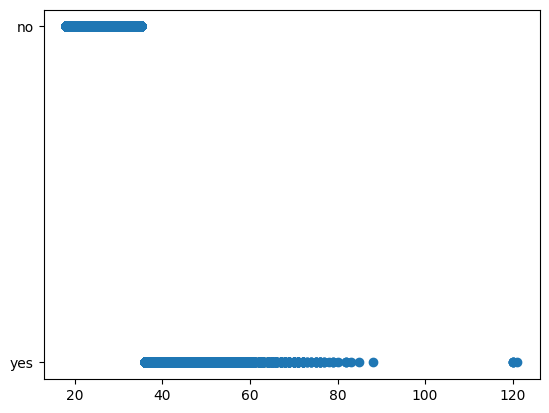

In [140]:
X3 = df['Age'].values
y3 = df['crime_occurence_age'].values
plt.scatter(X3, y3)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

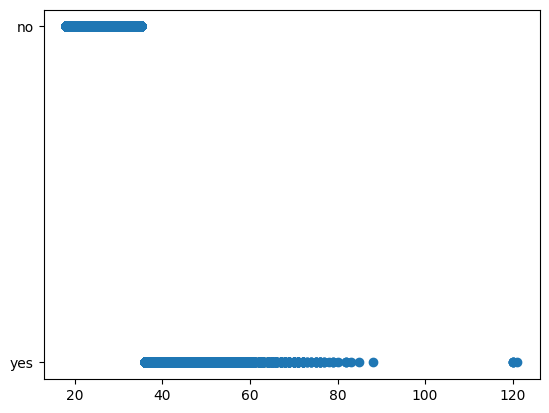

In [141]:
X4 = df['Age'].values
y4 = df['crime_occurence_age'].values
plt.scatter(X4, y4)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

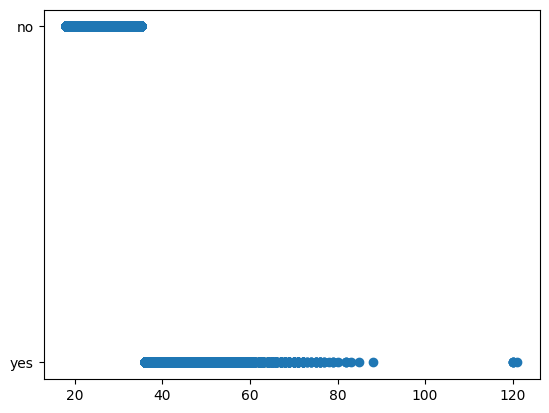

In [142]:
X5 = df['Age'].values
y5 = df['crime_occurence_age'].values
plt.scatter(X5, y5)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

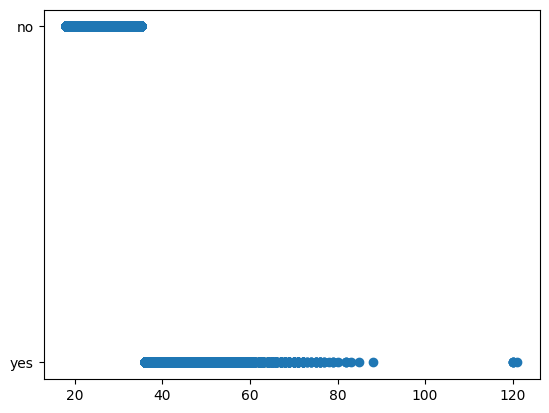

In [143]:
X6 = df['Age'].values
y6 = df['crime_occurence_age'].values
plt.scatter(X6, y6)
plt.show

## Vizualization Inference

### Feature Selection

In [170]:
features = ['Arrest Year', 'Arrest Hour', 'Age','Offense Latitude', 'Offense Longitude']
X= df.loc[:, features].values
y = df.loc[:, ['crime_occurence_age']].values

## Splitting Dataset into Test and Training Data

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Scaling and Standardizing Data

In [172]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Applying PCA from sklearn for 2 Principal Components

In [173]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train_SVM)
X_test_SVM_pca = pca.transform(X_test_SVM)  # Corrected variable name
principalDf = pd.DataFrame(data=principalComponents,
                            columns=['principal component 1', 'principal component 2'])
explained_variance = pca.explained_variance_ratio_


### Final Dataframe with label concatenated with features

In [174]:
finalDf = pd.concat([principalDf, df[['crime_occurence_age']]], axis = 1)

### Plot to observe the 2 Principal Components as a result of PCA

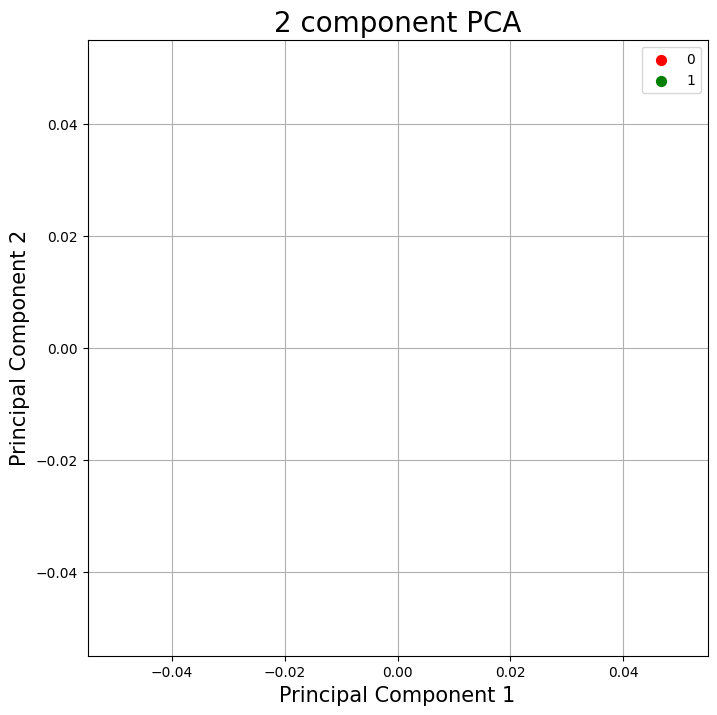

In [175]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['0', '1']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['crime_occurence_age'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Variance Ratio

In [176]:
print(explained_variance)

[0.99696325 0.00303675]


## KNN

In [123]:
balance_data = pd.DataFrame(df) 

X_KNN = balance_data.iloc[:, [2, 3]]
Y_KNN = balance_data.iloc[:, 5]

### Splitting the dataset into the Training set and Test set

In [124]:
from sklearn.model_selection import train_test_split

X_train_KNN, X_test_KNN, Y_train_KNN, Y_test_KNN = train_test_split(X_KNN, Y_KNN, test_size=0.30, random_state=0)


## Feature Scaling

In [125]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_KNN = sc.fit_transform(X_train_KNN)
X_test_KNN = sc.transform(X_test_KNN)

## Training and testing the model

In [126]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train_KNN, Y_train_KNN)

KNeighborsClassifier()

In [127]:
# Predicting the Test set results
Y_Pred_KNN = classifier.predict(X_test_KNN)

## Accuracy, Confusion Matrix & Heatmap

In [128]:
ac=accuracy_score(Y_test_KNN,Y_Pred_KNN)*100
ac

99.97870528109028

Model Accuracy for Random Forest: 0.9997870528109029


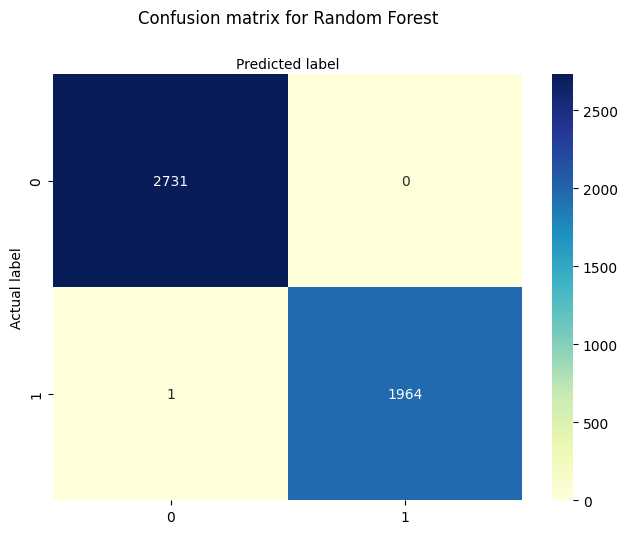

In [129]:
cnf_matrix_RandomForest = metrics.confusion_matrix(Y_test_KNN, Y_Pred_KNN)
cnf_matrix_RandomForest
# name  of classes
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_RandomForest), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Random Forest:",metrics.accuracy_score(Y_test_KNN, Y_Pred_KNN))

## Conclusion

###### The predictions made by various classification algorithms show the occurence possibility of a crime whether a crime will occur or not, if a crime occurs, will it be a violent or a non-violent crime or if a crime occurs, is the cause of the crime murder or not. These predictions might help the local police departments as well as the FBI solve many cases with esfficiency and accuracy.

###### Among the classification algorithms, Random Forest Classifier performs the best making a decision based on majority vote and constructing a decision tree for each feature. The highest accuracy achieve with Random Forest Classifier is 86.86%. Also, we observed that the dataset performs well with non-linear data as compared to linear data hence not so good results were achieved with Linear Regression.